<a href="https://colab.research.google.com/github/sanulisiya/Telco-churn-prediction20231263/blob/main/Machine_Learning_Coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [25]:
# ============================
# Standard Data Manipulation
# ============================
import pandas as pd
import numpy as np

# ============================
# Visualization Libraries
# ============================
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# ============================
# Scikit-learn (Task 2)
# ============================
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    roc_auc_score
)
from sklearn.tree import DecisionTreeClassifier

# ============================
# TensorFlow / Keras (Neural Network)
# ============================
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# ============================
# Ignore Warnings for Cleaner Output
# ============================
import warnings
warnings.filterwarnings("ignore")


# Add these to your imports section at the beginning:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
print("All libraries imported successfully!")


All libraries imported successfully!


Load the dataset


In [26]:
# Load the Telco Customer Churn dataset from GitHub
url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
df = pd.read_csv(url)

# Let's see what we loaded
print("Data set is Succesfully Loaded")
print("\nFirst 5 rows of the dataset:")
df.head()

Data set is Succesfully Loaded

First 5 rows of the dataset:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Data Inspection

In [27]:
# === DETAILED DATA INSPECTION ===

# 1. Check the data types and missing values
print("== DATASET INFO ==")
df.info()

== DATASET INFO ==
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 

**Task 1**


Exploratory Data Analysis (EDA)

Missing Values

In [28]:
# Check missing values
missing = df.isnull().sum()

if missing.sum() == 0:
    print(" No missing values!")
else:
    missing_df = pd.DataFrame({
        'Missing': missing[missing > 0],
        'Percent': (missing[missing > 0] / len(df) * 100).round(2)
    })
    print(missing_df)

 No missing values!


Check for Duplicates

In [29]:
import pandas as pd

# Check for duplicate rows and calculate the percentage
duplicates = df.duplicated().sum()
duplicate_percentage = (duplicates / len(df)) * 100

print(f"\nTotal duplicate rows: {duplicates}")
print(f"Percentage of duplicates: {duplicate_percentage:.2f}%")

if duplicates > 0:
    print("\nDuplicate rows found!")
    display(df[df.duplicated()].head())  # Display a few duplicate rows
else:
    print("No duplicate rows found!")



Total duplicate rows: 0
Percentage of duplicates: 0.00%
No duplicate rows found!


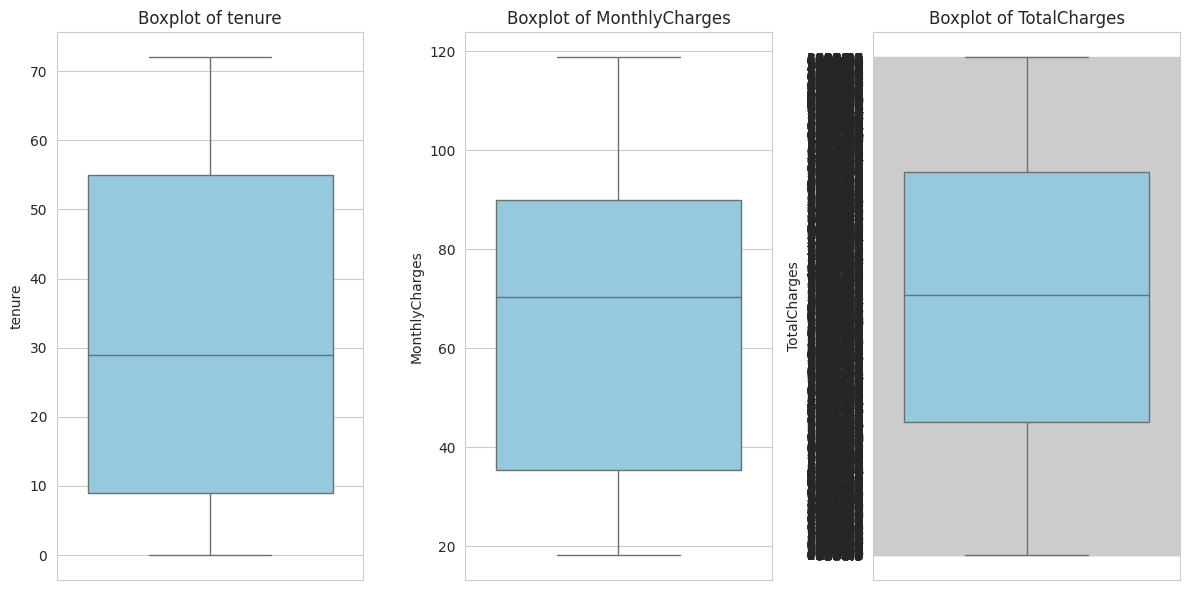

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

plt.figure(figsize=(12,6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1,3,i)
    sns.boxplot(y=df[col], color="skyblue")  # <- use df instead of df_clean
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


In [31]:
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # convert errors to NaN


In [32]:
df[num_cols] = df[num_cols].fillna(0)  # fill NaNs with 0
# or, if you prefer, drop rows:
# df = df.dropna(subset=num_cols)


In [33]:
outlier_summary = []

for col in num_cols:
    count, perc, l, u = detect_outliers_iqr(df, col)  # use df, not df_clean
    outlier_summary.append([col, count, f"{perc}%", l, u])

outlier_df = pd.DataFrame(outlier_summary,
                           columns=["Feature", "Outlier Count", "Percentage", "Lower Bound", "Upper Bound"])

print("\n=== OUTLIER SUMMARY (IQR METHOD) ===\n")
print(outlier_df)



=== OUTLIER SUMMARY (IQR METHOD) ===

          Feature  Outlier Count Percentage  Lower Bound  Upper Bound
0          tenure              0       0.0%      -60.000      124.000
1  MonthlyCharges              0       0.0%      -46.025      171.375
2    TotalCharges              0       0.0%    -4683.525     8868.675


Numerical column Summery

In [34]:
# 3. Get statistical summary of numerical columns
print("== NUMERICAL COLUMNS STATISTICS ==")
df.describe()

== NUMERICAL COLUMNS STATISTICS ==


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Numerical Features Analysis

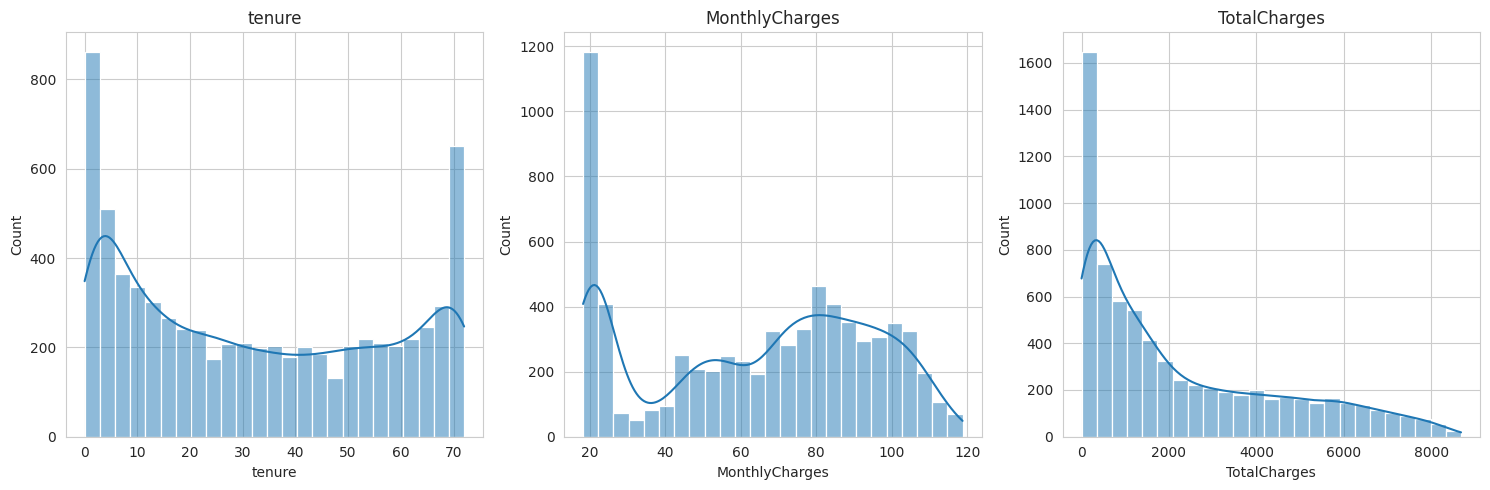

In [35]:
# Simple 3-feature histograms
features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Convert TotalCharges if needed
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Plot all three
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(features):
    sns.histplot(df[col].dropna(), kde=True, ax=axes[i], bins=25)
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

BOXPLOTS OF NUMERICAL FEATURES

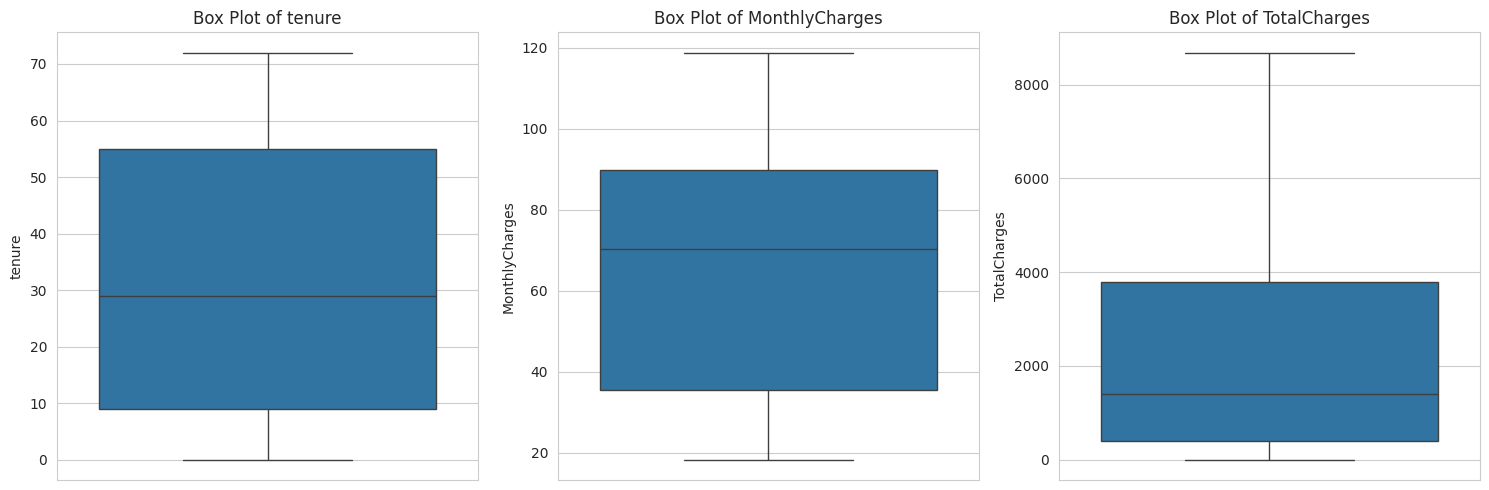

In [36]:
# BOX PLOTS FOR NUMERICAL FEATURES
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, feature in enumerate(num_features):
    sns.boxplot(y=df[feature], ax=axes[i])
    axes[i].set_title(f'Box Plot of {feature}')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

VIOLIN PLOTS FOR NUMERICAL FEATURES

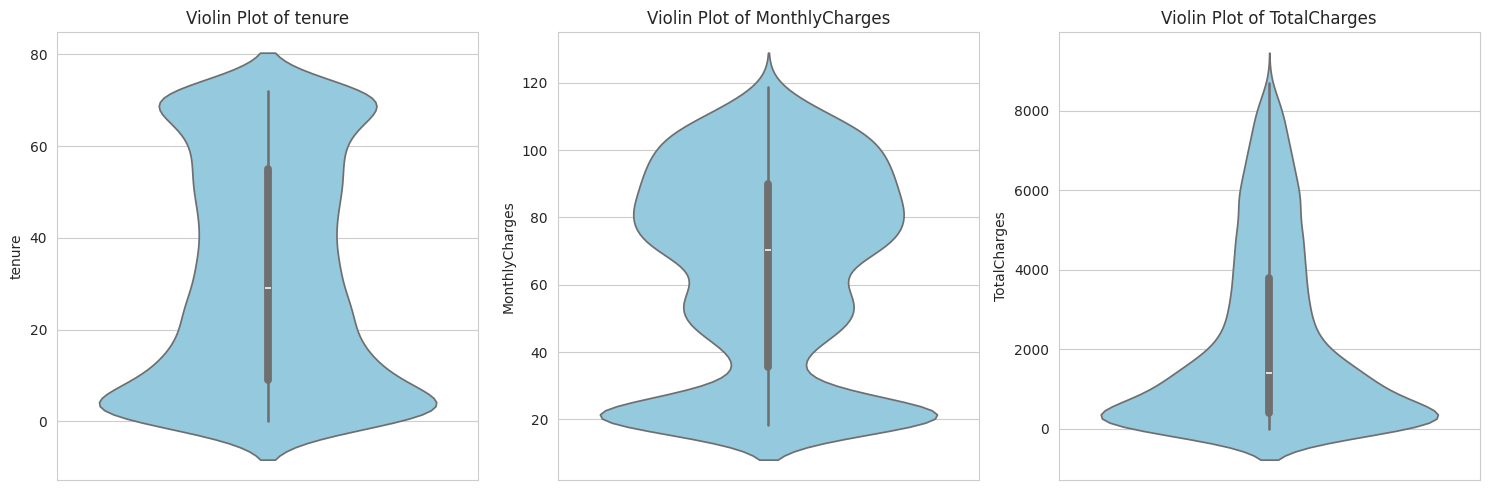

In [37]:
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, feature in enumerate(num_features):
    sns.violinplot(y=df[feature], ax=axes[i], color='skyblue')  # You can change color as needed
    axes[i].set_title(f'Violin Plot of {feature}')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()


Categorical Columns check

In [38]:
# 4. Check categorical columns
print("== CATEGORICAL COLUMNS ==")
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", list(categorical_cols))

# Show unique values in a few important categorical columns
print("\n== UNIQUE VALUES IN KEY CATEGORICAL COLUMNS ==")
print("Churn values:", df['Churn'].unique())
print("Contract types:", df['Contract'].unique())
print("Payment methods:", df['PaymentMethod'].unique())

== CATEGORICAL COLUMNS ==
Categorical columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

== UNIQUE VALUES IN KEY CATEGORICAL COLUMNS ==
Churn values: ['No' 'Yes']
Contract types: ['Month-to-month' 'One year' 'Two year']
Payment methods: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


Distribution Without the Churn Split

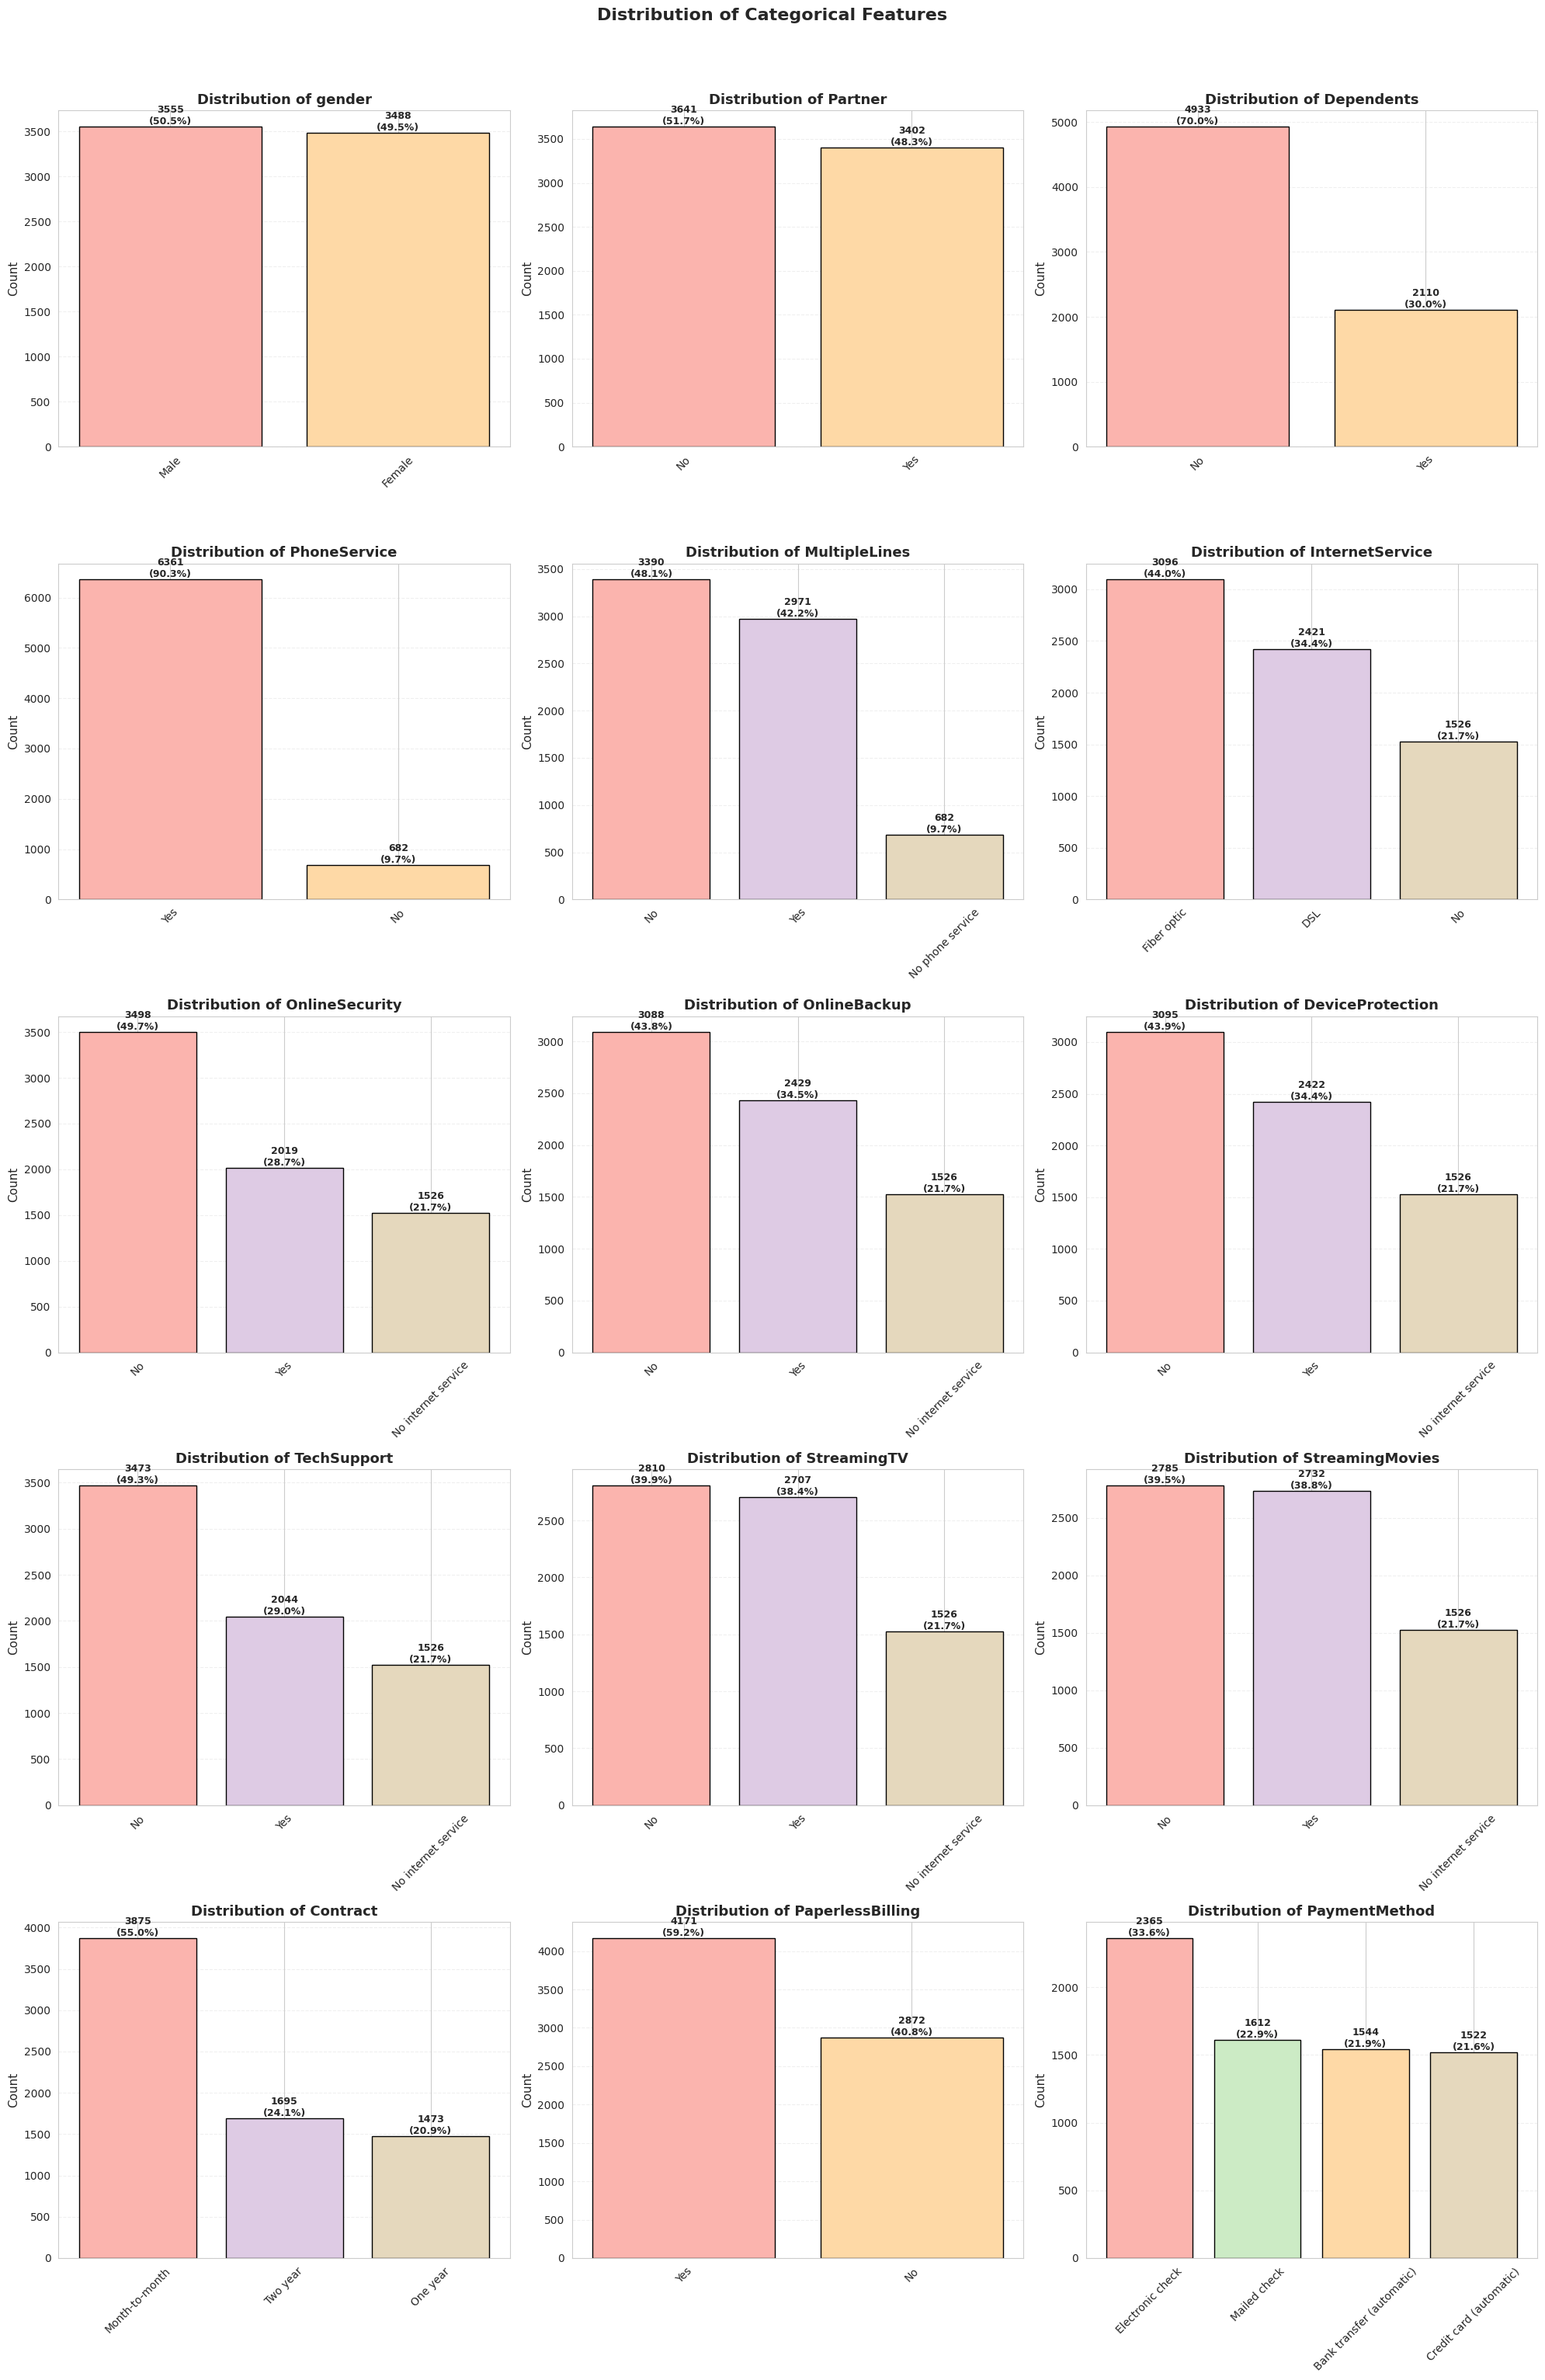

In [39]:
# Bar plots with percentages
cat_features = [
    'gender', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

fig, axes = plt.subplots(5, 3, figsize=(20, 30))
axes = axes.flatten()

for idx, col in enumerate(cat_features):
    ax = axes[idx]

    # Get value counts and percentages
    counts = df[col].value_counts()
    percentages = (counts / len(df) * 100).round(1)

    # Create bar plot with better colors
    colors = plt.cm.Pastel1(np.arange(len(counts)) / len(counts))
    bars = ax.bar(counts.index, counts.values, color=colors, edgecolor='black')

    # Formatting
    ax.set_title(f'Distribution of {col}', fontsize=13, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('Count', fontsize=11)
    ax.tick_params(axis='x', rotation=45, labelsize=10)
    ax.grid(axis='y', alpha=0.3, linestyle='--')

    # Add count and percentage labels
    for i, (bar, count, percent) in enumerate(zip(bars, counts.values, percentages.values)):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
               f'{count}\n({percent}%)', ha='center', va='bottom',
               fontsize=9, fontweight='bold')

plt.suptitle('Distribution of Categorical Features', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

 Distribution With the Churn Split

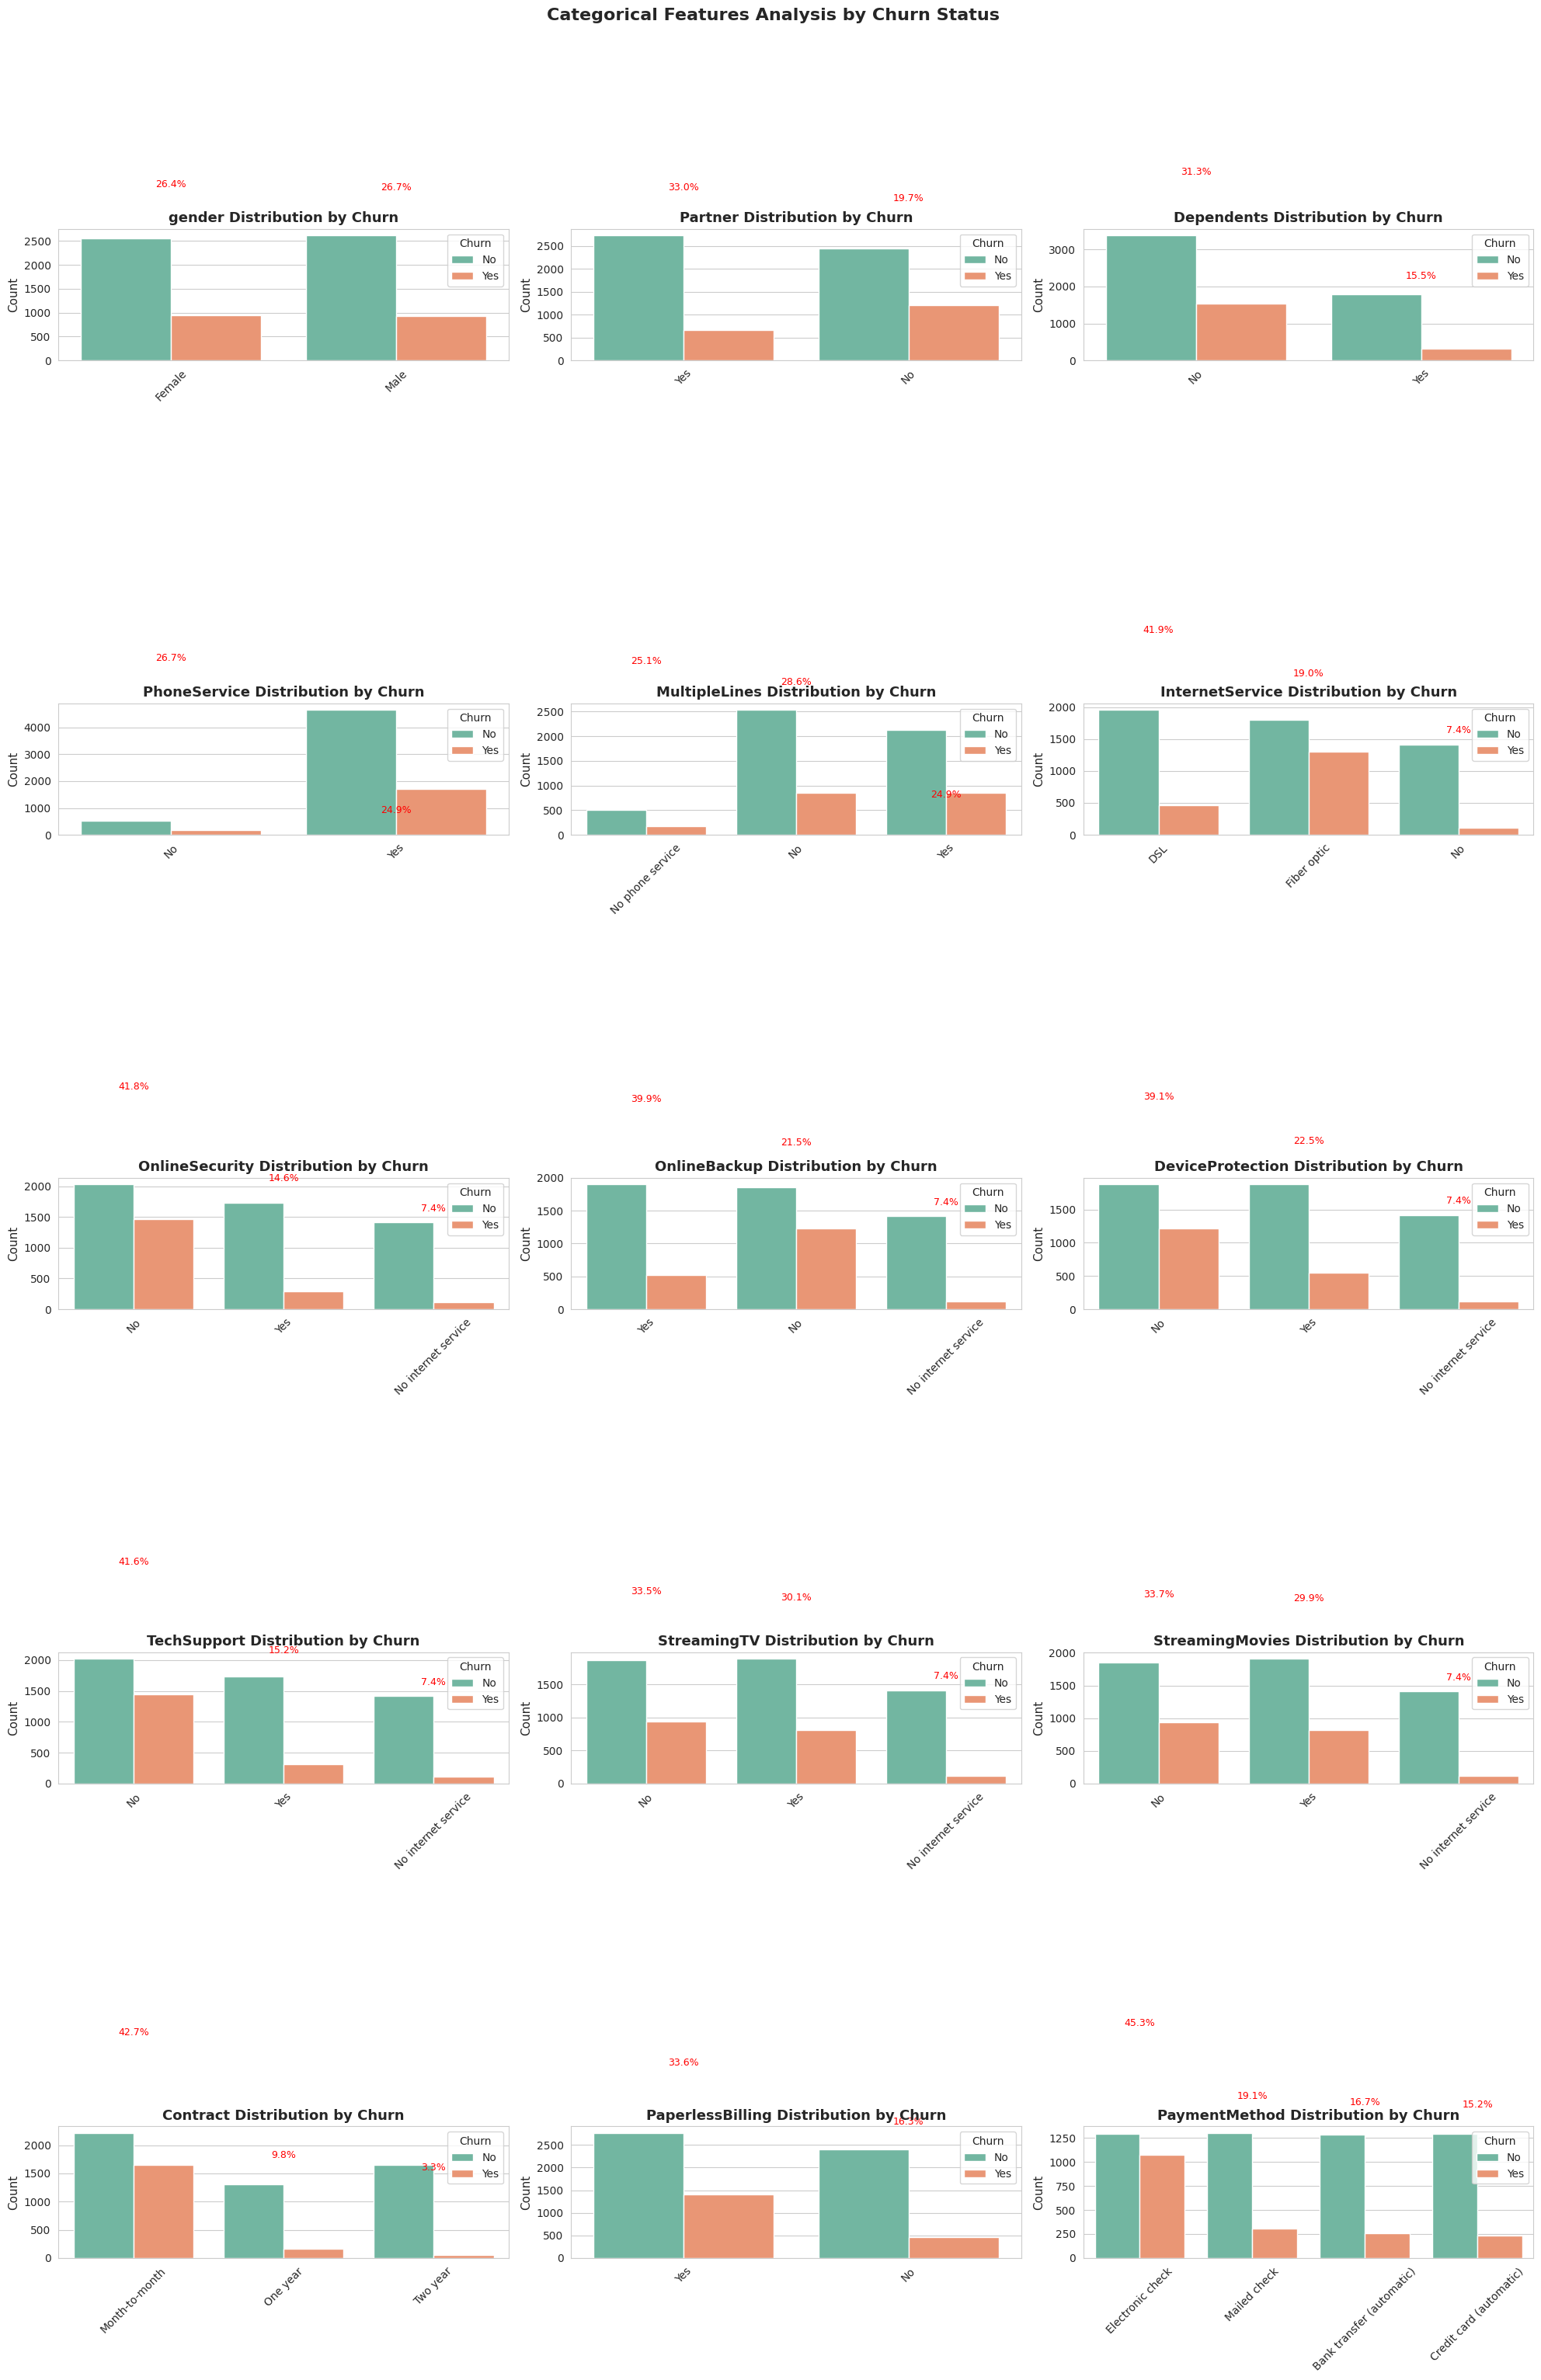

In [40]:
cat_features = [
    'gender', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

# Create better layout (5 rows, 3 columns for 15 features)
fig, axes = plt.subplots(5, 3, figsize=(20, 30))
axes = axes.flatten()

for idx, col in enumerate(cat_features):
    # Create stacked bar plot
    ax = axes[idx]
    sns.countplot(data=df, x=col, hue='Churn', ax=ax, palette='Set2')

    # Formatting
    ax.set_title(f'{col} Distribution by Churn', fontsize=13, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('Count', fontsize=11)
    ax.tick_params(axis='x', rotation=45, labelsize=10)

    # Add percentage annotations
    total_counts = df[col].value_counts()
    churn_counts = df[df['Churn'] == 'Yes'][col].value_counts()

    # Add churn rate on top
    for i, (total, churn) in enumerate(zip(total_counts, churn_counts)):
        churn_rate = (churn / total) * 100
        ax.text(i, total + max(total_counts)*0.02,
               f'{churn_rate:.1f}%', ha='center', fontsize=9, color='red')

plt.suptitle('Categorical Features Analysis by Churn Status', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

Pairplot the Numerical Columns

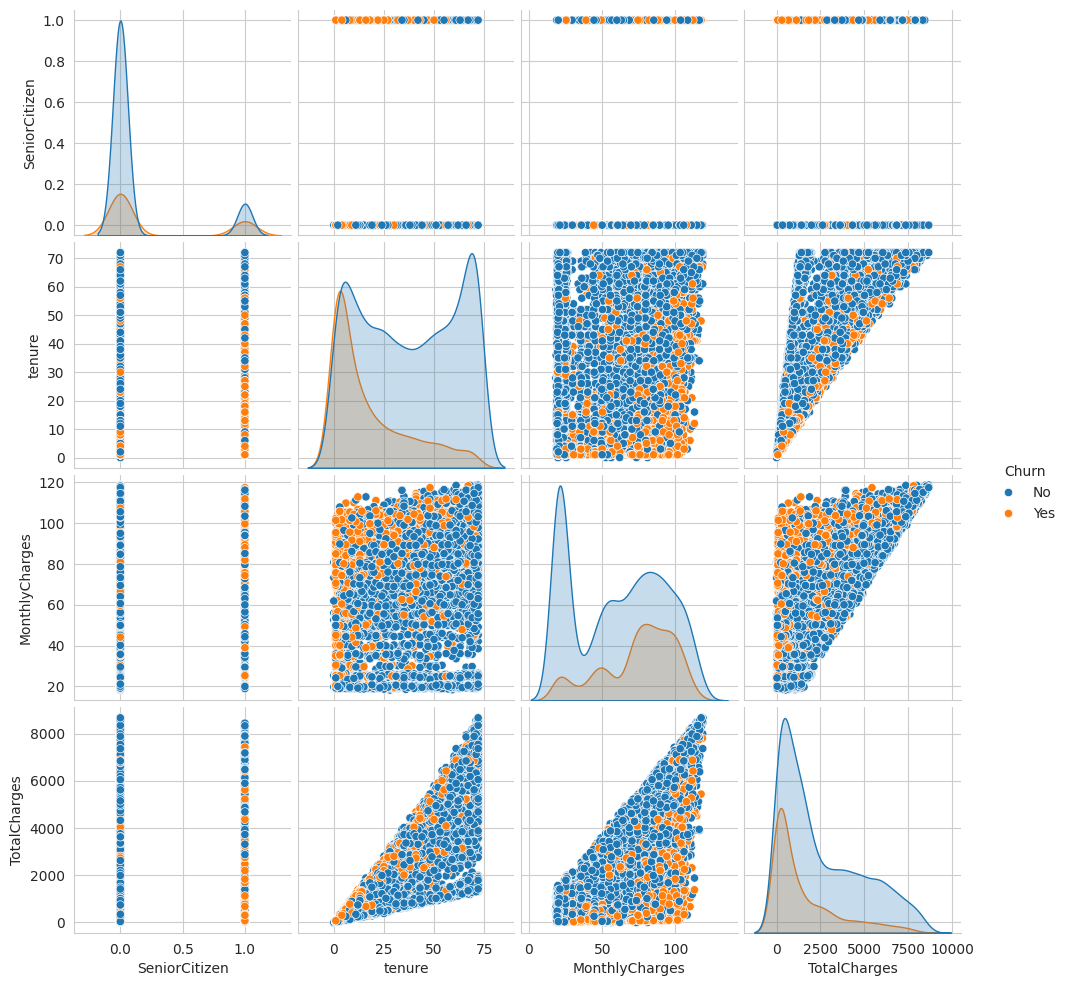

<Figure size 640x480 with 0 Axes>

In [41]:
# Select numerical columns for pairplot
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Create pairplot with Churn as hue
sns.pairplot(df, hue='Churn')
plt.show()
plt.suptitle('Pairplot of Numerical Features by Churn Status',
             y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Data Cleaning

In [42]:
# Before conversion: show problem rows
print("\nSample TotalCharges values (first 10):")
print(df["TotalCharges"].head(10).tolist())

# Convert TotalCharges to numeric, coercing errors to NaN
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
print("\nAfter conversion, NaNs in TotalCharges:", df["TotalCharges"].isna().sum())

# Show rows with NaN TotalCharges
if df["TotalCharges"].isna().sum() > 0:
    print("\nRows with missing TotalCharges (will display up to 10):")
    display(df[df["TotalCharges"].isna()].head(10))

# In original dataset there are 11 rows with blank TotalCharges
df_clean = df.dropna(subset=["TotalCharges"]).copy()
print("\nShape after dropping rows with missing TotalCharges:", df_clean.shape)



Sample TotalCharges values (first 10):
[29.85, 1889.5, 108.15, 1840.75, 151.65, 820.5, 1949.4, 301.9, 3046.05, 3487.95]

After conversion, NaNs in TotalCharges: 0

Shape after dropping rows with missing TotalCharges: (7043, 21)


Convert Total Charges to numeirc

In [43]:
# Show DataFrame info
print("DATAFRAME INFO")
print("=" * 50)
print(f"Class: {type(df)}")
print(f"Shape: {df.shape[0]} rows, {df.shape[1]} columns")
print()

# Show columns and data types
print("COLUMNS SUMMARY:")
print("-" * 40)
for i, col in enumerate(df.columns):
    dtype = df[col].dtype
    non_null = df[col].count()
    print(f"{i:2}. {col:20} {non_null:>6} non-null   {str(dtype):>10}")

DATAFRAME INFO
Class: <class 'pandas.core.frame.DataFrame'>
Shape: 7043 rows, 21 columns

COLUMNS SUMMARY:
----------------------------------------
 0. customerID             7043 non-null       object
 1. gender                 7043 non-null       object
 2. SeniorCitizen          7043 non-null        int64
 3. Partner                7043 non-null       object
 4. Dependents             7043 non-null       object
 5. tenure                 7043 non-null        int64
 6. PhoneService           7043 non-null       object
 7. MultipleLines          7043 non-null       object
 8. InternetService        7043 non-null       object
 9. OnlineSecurity         7043 non-null       object
10. OnlineBackup           7043 non-null       object
11. DeviceProtection       7043 non-null       object
12. TechSupport            7043 non-null       object
13. StreamingTV            7043 non-null       object
14. StreamingMovies        7043 non-null       object
15. Contract               7043 non-null  

Target Variable Distribution

In [44]:
# 5. Check the target variable distribution
print("== TARGET VARIABLE DISTRIBUTION (CHURN) ==")
churn_distribution = df['Churn'].value_counts()
print(churn_distribution)

# Calculate percentages
print("\n== CHURN PERCENTAGES ==")
churn_percentages = df['Churn'].value_counts(normalize=True) * 100
print(churn_percentages)

== TARGET VARIABLE DISTRIBUTION (CHURN) ==
Churn
No     5174
Yes    1869
Name: count, dtype: int64

== CHURN PERCENTAGES ==
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


 VISUALIZE CHURN DISTRIBUTION

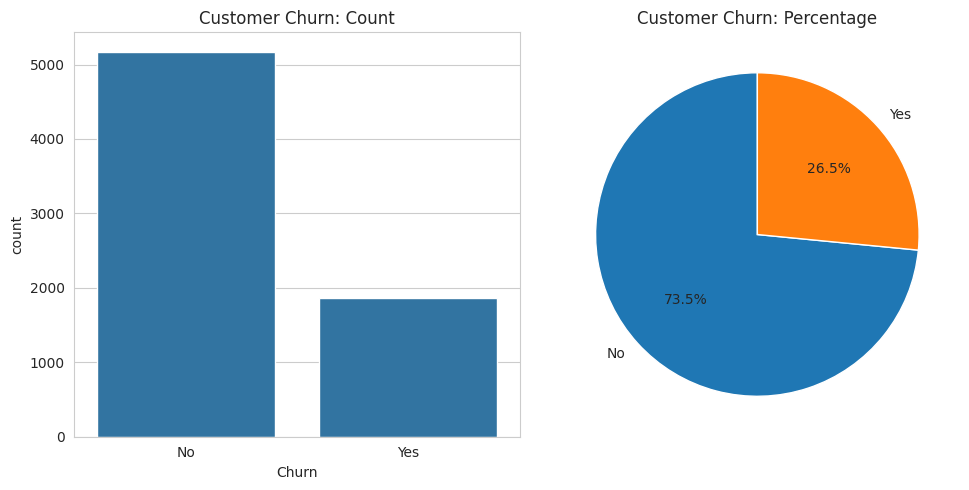

Customers who DID NOT churn: 5174 (73.5%)
Customers who CHURNED: 1869 (26.5%)


In [45]:
plt.figure(figsize=(10, 5))

# First subplot - Count plot
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Churn')
plt.title('Customer Churn: Count')

# Second subplot - Pie chart
plt.subplot(1, 2, 2)
churn_counts = df['Churn'].value_counts()
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Customer Churn: Percentage')

plt.tight_layout()
plt.show()

# Print the exact numbers
print(f"Customers who DID NOT churn: {churn_counts['No']} ({churn_counts['No']/len(df)*100:.1f}%)")
print(f"Customers who CHURNED: {churn_counts['Yes']} ({churn_counts['Yes']/len(df)*100:.1f}%)")

Percentage Bar

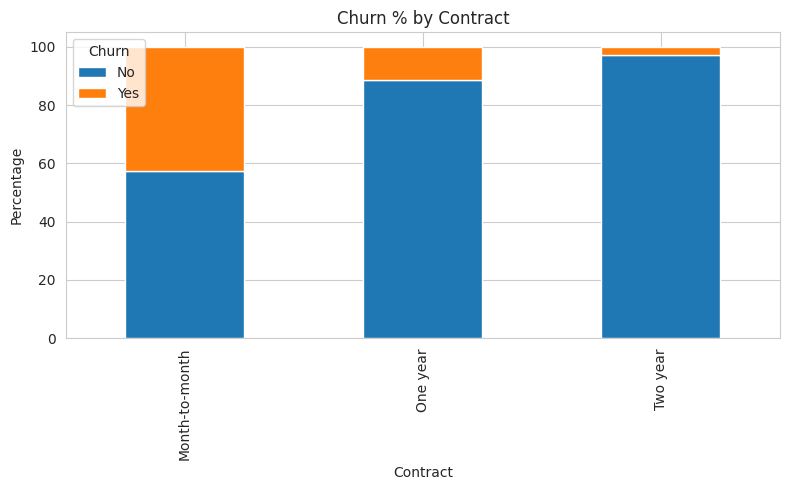

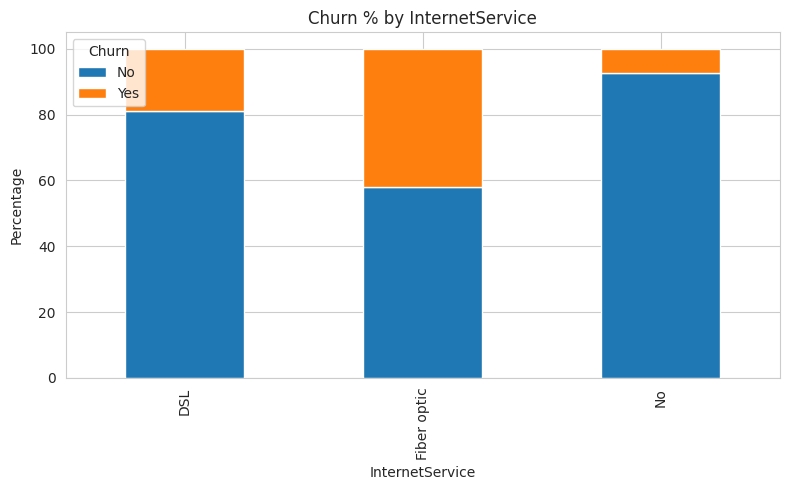

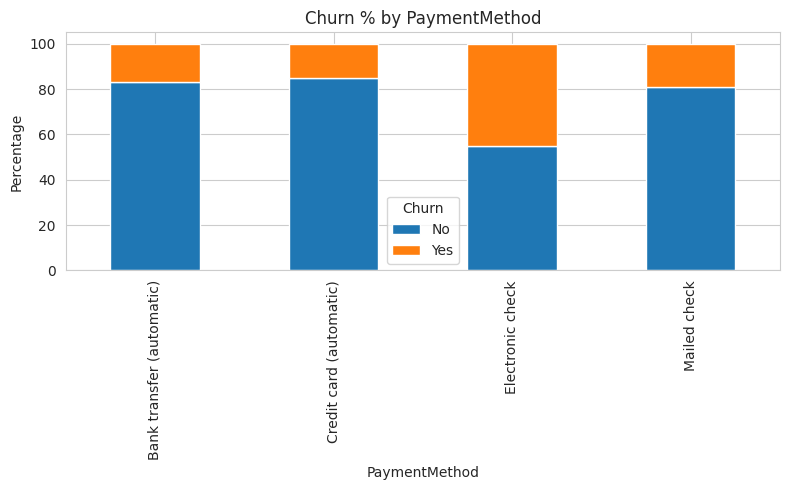

In [46]:
def stacked_percent_bar(col):
    ct = pd.crosstab(df_clean[col], df_clean["Churn"], normalize="index")*100
    ct = ct[["No","Yes"]] if "No" in ct.columns and "Yes" in ct.columns else ct
    ct.plot(kind="bar", stacked=True, figsize=(8,5))
    plt.legend(title="Churn")
    plt.ylabel("Percentage")
    plt.title(f"Churn % by {col}")
    plt.tight_layout()
    plt.show()

stacked_percent_bar("Contract")
stacked_percent_bar("InternetService")
stacked_percent_bar("PaymentMethod")

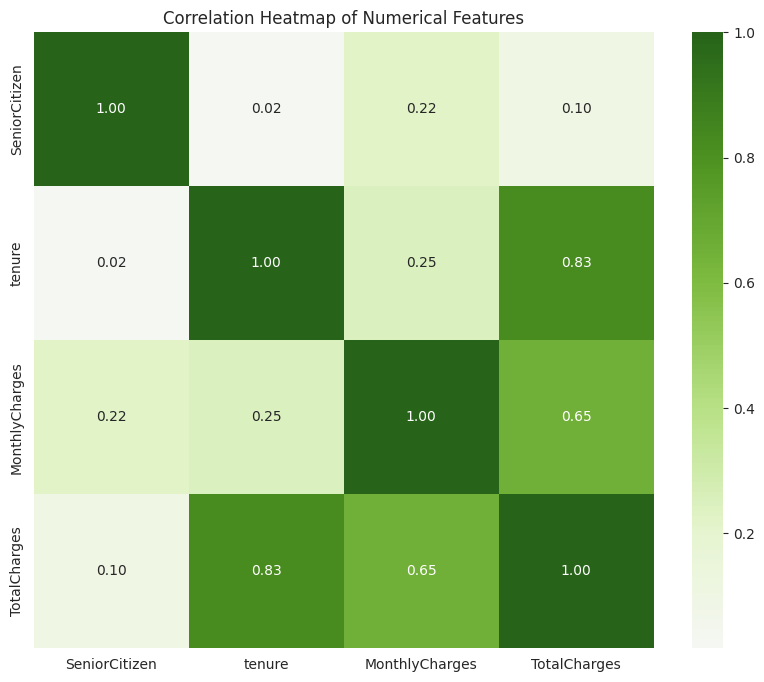

In [47]:
# === CORRELATION BETWEEN NUMERICAL FEATURES ===
plt.figure(figsize=(10, 8))

# Select only numerical columns
numerical_df = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numerical_df.corr()

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="PiYG", center=0, fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

Feature Importance Visualization

In [48]:
# === DATA QUALITY CHECK ===
print("== DATA QUALITY SUMMARY ==")
print(f"Total missing values: {df.isnull().sum().sum()}")
print(f"Duplicate rows: {df.duplicated().sum()}")

# Check for any whitespace or strange values in categorical columns
print("\n=== CHECKING FOR DATA ISSUES ===")
for col in df.select_dtypes(include=['object']).columns:
    if col != 'customerID':  # Skip customer ID
        unique_vals = df[col].unique()
        print(f"{col}: {len(unique_vals)} unique values")
        if len(unique_vals) < 10:  # Only show if not too many values
            print(f"   Values: {unique_vals}")

== DATA QUALITY SUMMARY ==
Total missing values: 0
Duplicate rows: 0

=== CHECKING FOR DATA ISSUES ===
gender: 2 unique values
   Values: ['Female' 'Male']
Partner: 2 unique values
   Values: ['Yes' 'No']
Dependents: 2 unique values
   Values: ['No' 'Yes']
PhoneService: 2 unique values
   Values: ['No' 'Yes']
MultipleLines: 3 unique values
   Values: ['No phone service' 'No' 'Yes']
InternetService: 3 unique values
   Values: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: 3 unique values
   Values: ['No' 'Yes' 'No internet service']
OnlineBackup: 3 unique values
   Values: ['Yes' 'No' 'No internet service']
DeviceProtection: 3 unique values
   Values: ['No' 'Yes' 'No internet service']
TechSupport: 3 unique values
   Values: ['No' 'Yes' 'No internet service']
StreamingTV: 3 unique values
   Values: ['No' 'Yes' 'No internet service']
StreamingMovies: 3 unique values
   Values: ['No' 'Yes' 'No internet service']
Contract: 3 unique values
   Values: ['Month-to-month' 'One year' 'Two year']
Pap

In [49]:
# Key Insights Summary
print("KEY INSIGHTS")
print("=" * 40)

# 1. Overall churn
churn_rate = (df['Churn'] == 'Yes').mean() * 100
print(f"1. Overall churn rate: {churn_rate:.1f}%")

# 2. Churn by contract
contract_churn = df.groupby('Contract')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
print(f"\n2. Churn by contract type:")
for contract, rate in contract_churn.sort_values().items():
    print(f"   {contract}: {rate:.1f}%")

# 3. Tenure difference
tenure_diff = df.groupby('Churn')['tenure'].mean()
print(f"\n3. Average tenure:")
print(f"   Churned: {tenure_diff['Yes']:.1f} months")
print(f"   Stayed: {tenure_diff['No']:.1f} months")

# 4. Monthly charges difference
charges_diff = df.groupby('Churn')['MonthlyCharges'].mean()
print(f"\n4. Average monthly charges:")
print(f"   Churned: ${charges_diff['Yes']:.2f}")
print(f"   Stayed: ${charges_diff['No']:.2f}")

KEY INSIGHTS
1. Overall churn rate: 26.5%

2. Churn by contract type:
   Two year: 2.8%
   One year: 11.3%
   Month-to-month: 42.7%

3. Average tenure:
   Churned: 18.0 months
   Stayed: 37.6 months

4. Average monthly charges:
   Churned: $74.44
   Stayed: $61.27


Task **2**

**Drop** Unsessary Columns (Customer ID)

In [50]:
# Drop the 'customerID' column if it exists
if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)

# Verify
print(df.head())


   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No  

In [51]:
# Encode target variable
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})
print(" Target variable encoded (Yes=1, No=0)")

binary = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

# Encode binary features
for col in binary:
    df[col] = df[col].map({
        'Yes': 1, 'No': 0,
        'Male': 0, 'Female': 1
    })

print(" Binary features successfully encoded (Yes/No and Male/Female converted to 0/1).")


 Target variable encoded (Yes=1, No=0)
 Binary features successfully encoded (Yes/No and Male/Female converted to 0/1).


In [52]:
multi_class_features = ['Contract', 'PaymentMethod', 'InternetService', 'MultipleLines',
                        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                        'TechSupport', 'StreamingTV', 'StreamingMovies']
df = pd.get_dummies(df, columns=multi_class_features, drop_first=True)

df.apply(lambda x: x.unique())


,0
gender,"[1, 0]"
SeniorCitizen,"[0, 1]"
Partner,"[1, 0]"
Dependents,"[0, 1]"
tenure,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ..."
PhoneService,"[0, 1]"
PaperlessBilling,"[1, 0]"
MonthlyCharges,"[29.85, 56.95, 53.85, 42.3, 70.7, 99.65, 89.1,..."
TotalCharges,"[29.85, 1889.5, 108.15, 1840.75, 151.65, 820.5..."
Churn,"[0, 1]"


In [53]:
from sklearn.preprocessing import MinMaxScaler

# Feature Scaling
feature_scaling = ['tenure', 'MonthlyCharges', 'TotalCharges']

print("Checking data quality before scaling:")
for col in feature_scaling:
    if col in df.columns:
        nan_count = df[col].isna().sum()
        print(f"{col}: {nan_count} NaN values")

# Handle any NaN values
if 'df_clean' in locals():
    working_df = df_clean.copy()
    print("\nUsing cleaned dataframe (df_clean)")
else:
    working_df = df.copy()
    for col in feature_scaling:
        if col in working_df.columns and working_df[col].isna().sum() > 0:
            median_val = working_df[col].median()
            working_df[col] = working_df[col].fillna(median_val)
            print(f"Filled NaN values in {col} with median: {median_val}")

# Apply scaling
scaler = MinMaxScaler()
working_df[feature_scaling] = scaler.fit_transform(working_df[feature_scaling])


Checking data quality before scaling:
tenure: 0 NaN values
MonthlyCharges: 0 NaN values
TotalCharges: 0 NaN values

Using cleaned dataframe (df_clean)


In [54]:
# Separate features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")
print(f"Training class distribution: {np.bincount(y_train)}")
print(f"Testing class distribution: {np.bincount(y_test)}")

# Create validation split for plotting learning curves
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)


Training set size: (5634, 30)
Testing set size: (1409, 30)
Training class distribution: [4139 1495]
Testing class distribution: [1035  374]


In [55]:
# ============================
# Separate Features and Target
# ============================
X = df.drop('Churn', axis=1)
y = df['Churn']

print("\n" + "=" * 70)
print("DATA SUMMARY AFTER PREPROCESSING")
print("=" * 70)
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Number of features: {X.shape[1]}")

# ============================
# Train-Test Split
# ============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



DATA SUMMARY AFTER PREPROCESSING
Features shape: (7043, 30)
Target shape: (7043,)
Number of features: 30


In [56]:
print("\n" + "=" * 70)
print("HANDLING CLASS IMBALANCE WITH SMOTE")
print("=" * 70)

print("Original training class distribution:")
print(y_train.value_counts())
print("\nAfter SMOTE:")

import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE

# X_train
X_train_clean = X_train.fillna(0).astype('float32')

# y_train
if isinstance(y_train, pd.Series) and y_train.dtype == 'object':
    y_train_clean = y_train.map({'Yes': 1, 'No': 0}) if 'Yes' in str(y_train.iloc[0]) else y_train.astype('int32')
else:
    y_train_clean = y_train.astype('int32')

# Check class distribution before SMOTE
print("=== BEFORE SMOTE ===")
print(f"Original dataset shape: {X_train.shape}")
class_counts_before = pd.Series(y_train_clean).value_counts()
print(f"Class distribution:\n{class_counts_before}")

# Apply SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_clean, y_train_clean)

print(f"\n=== AFTER SMOTE ===")
print(f"SMOTE done! {X_train.shape[0]} → {X_train_res.shape[0]} samples")

# Check class distribution after SMOTE
class_counts_after = pd.Series(y_train_res).value_counts().sort_index()
print(f"Resampled dataset shape: {X_train_res.shape}")
print(f"Class distribution after SMOTE:\n{class_counts_after}")

# Calculate percentages after SMOTE
class_percentages_after = (class_counts_after / len(y_train_res) * 100).round(2)
print(f"Class percentages after SMOTE:\n{class_percentages_after}%")

X_train_res = pd.DataFrame(X_train_res).replace([np.inf, -np.inf], np.nan)
X_train_res = X_train_res.fillna(0).astype('float32')

y_train_res = pd.Series(y_train_res).astype('int32')

X_test_clean = X_test.copy()

# Replace inf → NaN → 0
X_test_clean = X_test_clean.replace([np.inf, -np.inf], np.nan)
X_test_clean = X_test_clean.fillna(0).astype('float32')
print("NaNs in X_train_res:", np.isnan(X_train_res).sum())
print("NaNs in X_test_clean:", np.isnan(X_test_clean).sum())



HANDLING CLASS IMBALANCE WITH SMOTE
Original training class distribution:
Churn
0    4139
1    1495
Name: count, dtype: int64

After SMOTE:
=== BEFORE SMOTE ===
Original dataset shape: (5634, 30)
Class distribution:
Churn
0    4139
1    1495
Name: count, dtype: int64

=== AFTER SMOTE ===
SMOTE done! 5634 → 8278 samples
Resampled dataset shape: (8278, 30)
Class distribution after SMOTE:
Churn
0    4139
1    4139
Name: count, dtype: int64
Class percentages after SMOTE:
Churn
0    50.0
1    50.0
Name: count, dtype: float64%
NaNs in X_train_res: gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Contract_One year                        0
Contract_Two year    

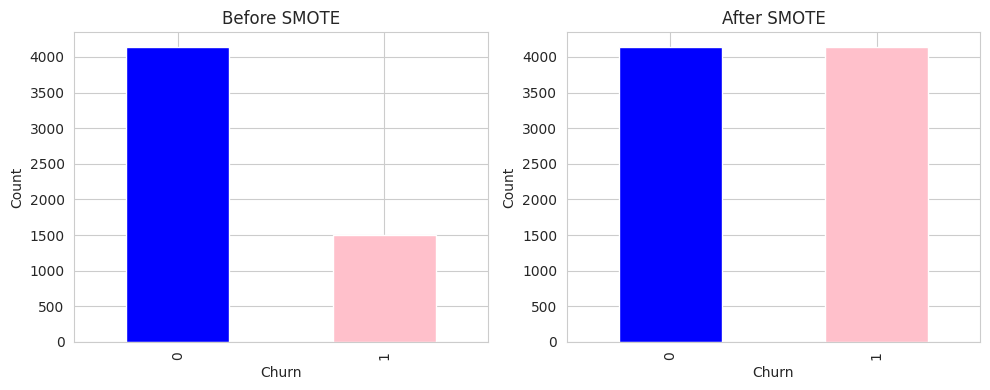

In [57]:
import matplotlib.pyplot as plt

# Simple visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Before
pd.Series(y_train_clean).value_counts().plot(kind='bar', ax=ax1,
                                             color=['blue', 'pink'])
ax1.set_title('Before SMOTE')
ax1.set_xlabel('Churn')
ax1.set_ylabel('Count')

# After
pd.Series(y_train_res).value_counts().plot(kind='bar', ax=ax2,
                                           color=['blue', 'pink'])
ax2.set_title('After SMOTE')
ax2.set_xlabel('Churn')
ax2.set_ylabel('Count')

plt.tight_layout()
plt.show()


**Model** **Training**

Decsision Tree

Baseline Decsision Tree Model

In [58]:
# Cell 1: Baseline Decision Tree Training

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Train the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_res, y_train_res)  # Use y_train_res (not Y_train_res)

# Predictions
prediction_test = dt.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, prediction_test)  # Use y_test (not Y_test)
print(f"Baseline Decision Tree Accuracy: {accuracy:.4f}")


Baseline Decision Tree Accuracy: 0.7253


Visulaize basic D **Tree**

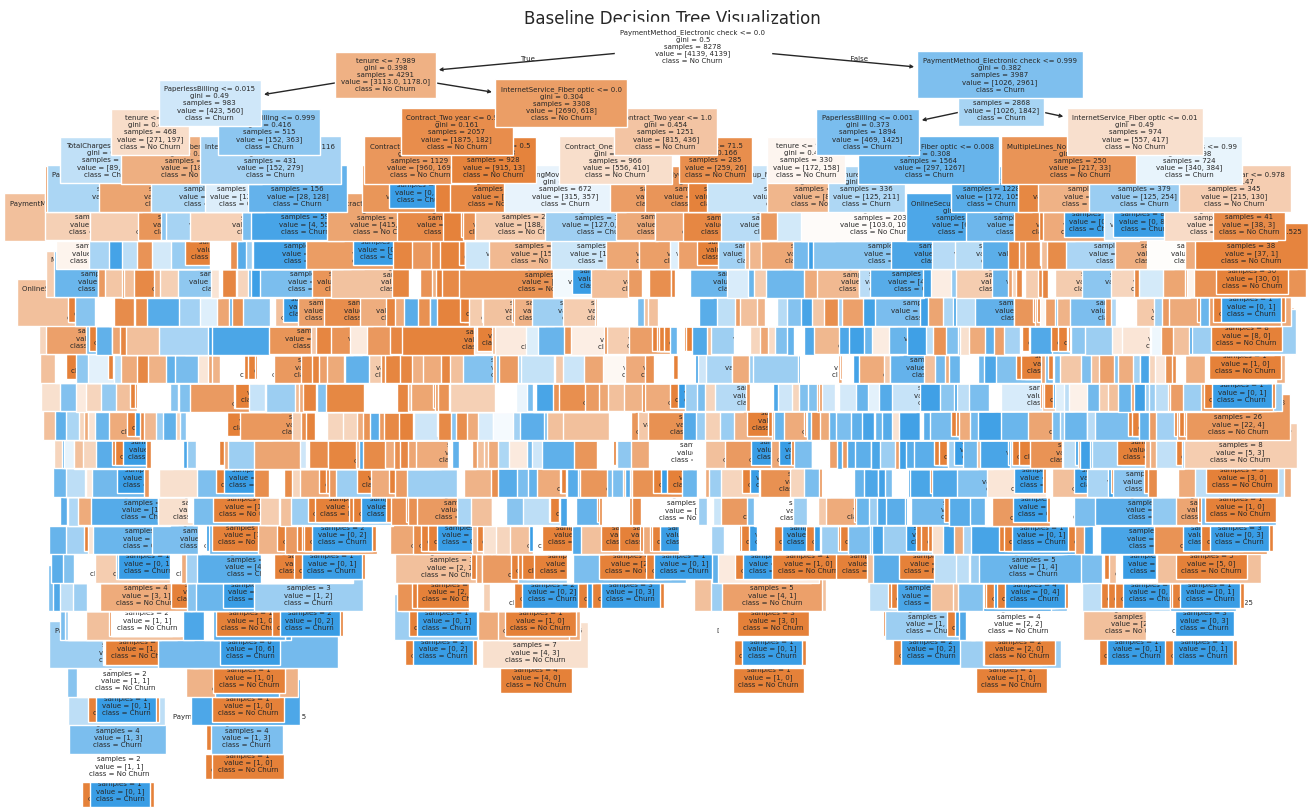

In [59]:
# Cell 2: Visualizing the Baseline Decision Tree

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plotting the Decision Tree
plt.figure(figsize=(15,10))  # Increase the figure size for better clarity
plot_tree(dt, filled=True, feature_names=X_train_res.columns, class_names=['No Churn', 'Churn'], fontsize=5)
plt.title("Baseline Decision Tree Visualization")
plt.show()


Hyper Parameter tuning

Pruning tuning for Decsison tree


In [60]:
 #Pruning the Decision Tree

# Get pruning alphas (cost-complexity pruning path)
path = dt.cost_complexity_pruning_path(X_train_res, y_train_res)  # Use y_train_res
ccp_alphas = path.ccp_alphas

# List to store all pruned trees
models = []

# Train pruned trees for each alpha value
for alpha in ccp_alphas:
    pruned_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    pruned_tree.fit(X_train_res, y_train_res)  # Use y_train_res
    models.append(pruned_tree)

# Evaluate all pruned models
train_acc = []
test_acc = []
test_auc = []

for model in models:
    train_acc.append(accuracy_score(y_train_res, model.predict(X_train_res)))  # Use y_train_res
    test_acc.append(accuracy_score(y_test, model.predict(X_test)))  # Use y_test
    y_prob = model.predict_proba(X_test)[:, 1]
    test_auc.append(roc_auc_score(y_test, y_prob))  # Use y_test

# Select the best model (based on AUC score)
best_index = test_auc.index(max(test_auc))

# Print details for the best pruned model
print("Best alpha:", ccp_alphas[best_index])
print("Train Accuracy:", train_acc[best_index])
print("Test Accuracy:", test_acc[best_index])
print("ROC AUC:", test_auc[best_index])


Best alpha: 0.0005889656771512291
Train Accuracy: 0.8576950954336796
Test Accuracy: 0.7785663591199432
ROC AUC: 0.8231871141078302


In [61]:
 #Final Best Pruned Decision Tree Training

# Train the best pruned tree with the best alpha
best_pruning_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alphas[best_index])
best_pruning_tree.fit(X_train_res, y_train_res)  # Use y_train_res

# Model details
print(best_pruning_tree)


DecisionTreeClassifier(ccp_alpha=np.float64(0.0005889656771512291),
                       random_state=42)


Pruned DT visualization

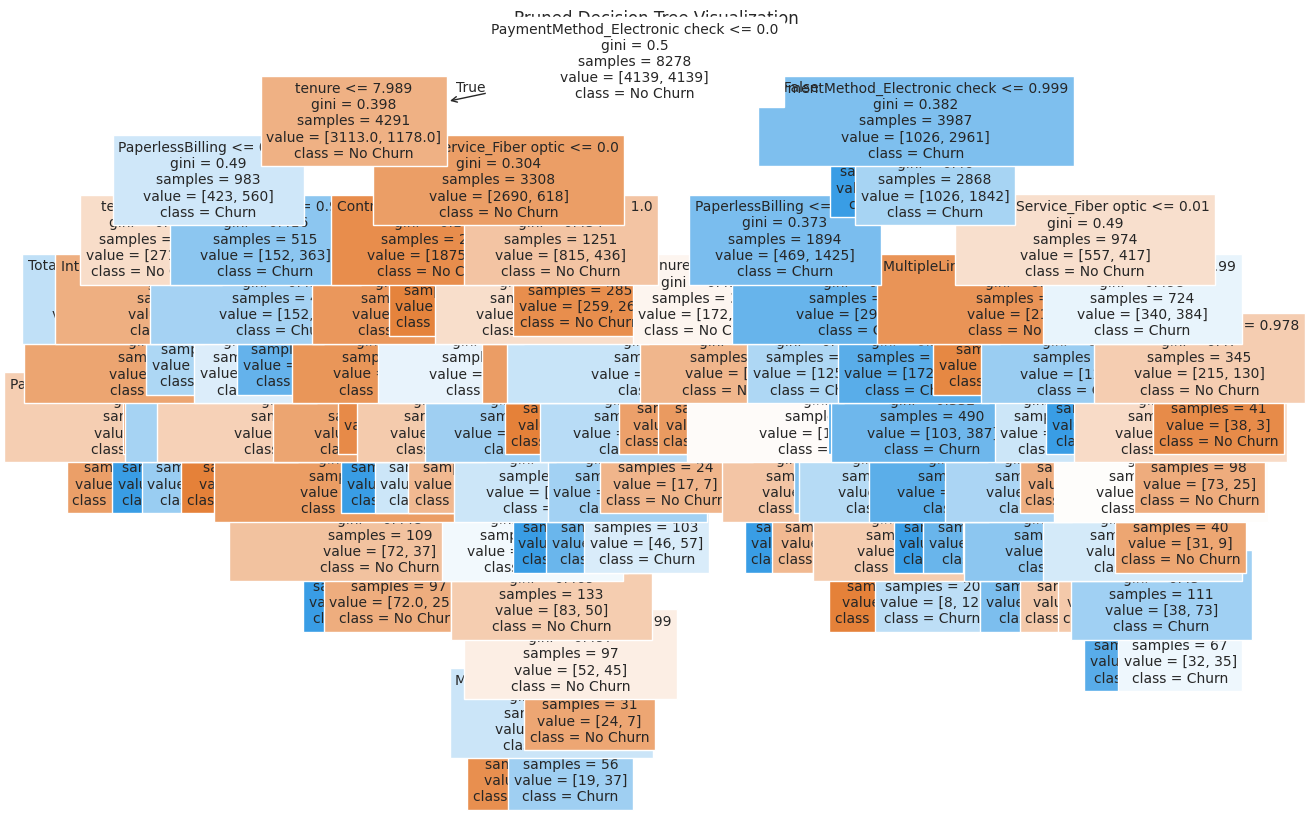

In [62]:
 # Visualizing the final pruned decision tree
plt.figure(figsize=(15,10))
plot_tree(best_pruning_tree, filled=True, feature_names=X_train_res.columns, class_names=['No Churn', 'Churn'], fontsize=10)
plt.title("Pruned Decision Tree Visualization")
plt.show()


ROC Curve

In [63]:
y_pred_baseline = dt.predict(X_test)
y_pred_tuned = best_pruning_tree.predict(X_test)


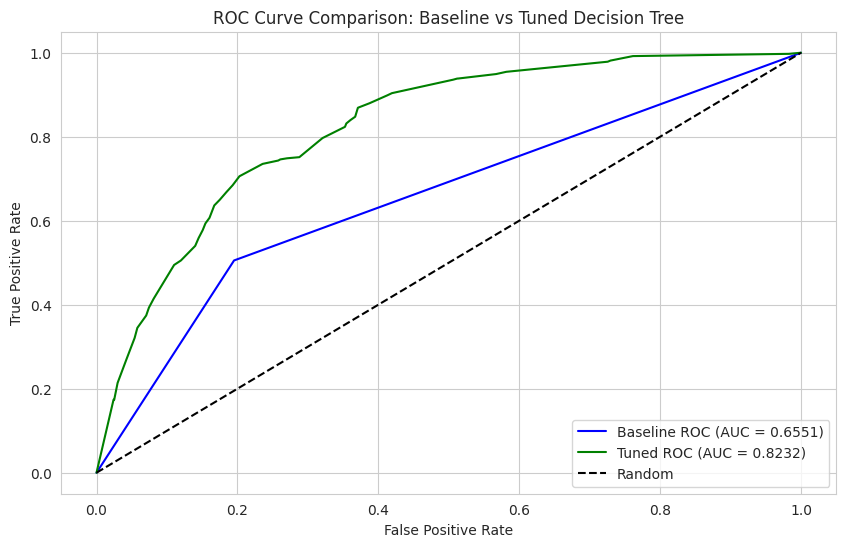

In [64]:
# For the baseline model
y_pred_proba_baseline = dt.predict_proba(X_test)[:, 1]  # Get probability of positive class (churn)

# For the tuned (pruned) model
y_pred_proba_tuned = best_pruning_tree.predict_proba(X_test)[:, 1]
  # Same for the tuned model



# ROC Curve for Baseline Model
fpr_baseline, tpr_baseline, _ = roc_curve(y_test, y_pred_proba_baseline)
roc_auc_baseline = roc_auc_score(y_test, y_pred_proba_baseline)

# ROC Curve for Tuned Model
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_pred_proba_tuned)
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned)

# Plotting ROC curves
plt.figure(figsize=(10,6))
plt.plot(fpr_baseline, tpr_baseline, label=f'Baseline ROC (AUC = {roc_auc_baseline:.4f})', color='blue')
plt.plot(fpr_tuned, tpr_tuned, label=f'Tuned ROC (AUC = {roc_auc_tuned:.4f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison: Baseline vs Tuned Decision Tree')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Confusion Matrix

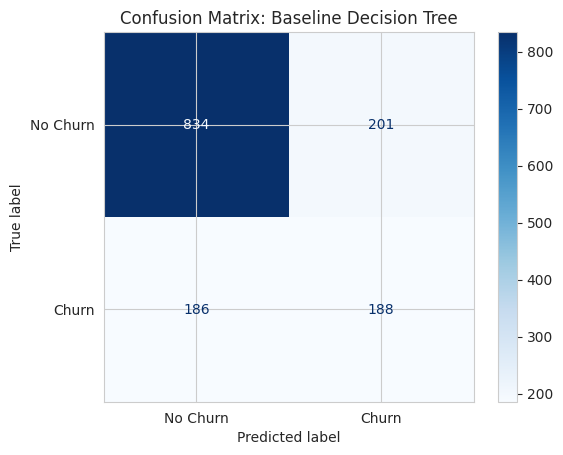

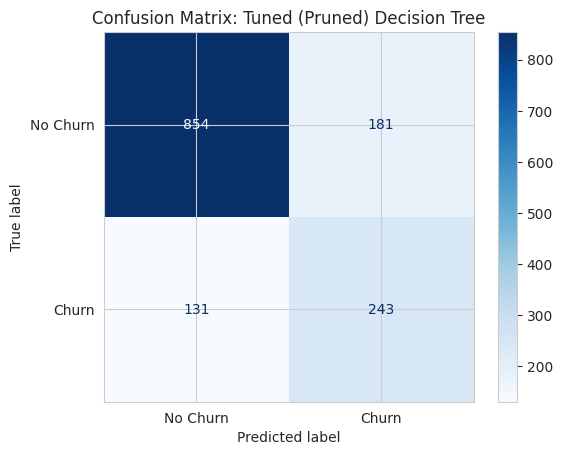

In [65]:
# Confusion Matrix for Baseline Model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix for baseline
cm_baseline = confusion_matrix(y_test, y_pred_baseline)
cm_display_baseline = ConfusionMatrixDisplay(confusion_matrix=cm_baseline, display_labels=['No Churn', 'Churn'])
cm_display_baseline.plot(cmap='Blues')
plt.title('Confusion Matrix: Baseline Decision Tree')
plt.show()

# Confusion Matrix for Tuned Model
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
cm_display_tuned = ConfusionMatrixDisplay(confusion_matrix=cm_tuned, display_labels=['No Churn', 'Churn'])
cm_display_tuned.plot(cmap='Blues')
plt.title('Confusion Matrix: Tuned (Pruned) Decision Tree')
plt.show()


Feature Importance Plot

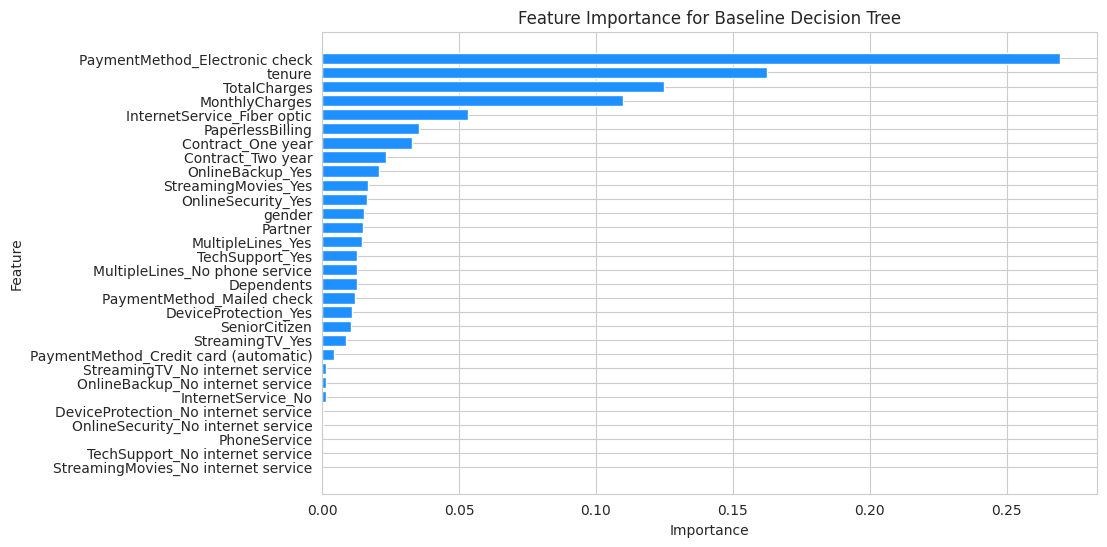

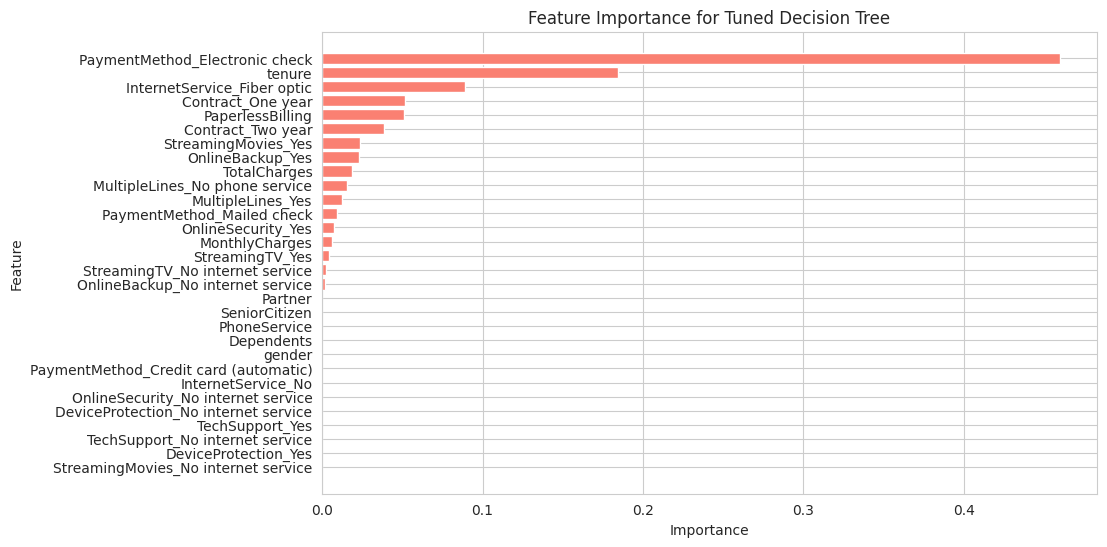

In [66]:
# Feature Importance for Baseline Model
feature_importance_baseline = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt.feature_importances_
}).sort_values('Importance', ascending=False)

# Plotting Feature Importance for the Baseline Model
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_baseline['Feature'], feature_importance_baseline['Importance'], color='dodgerblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Baseline Decision Tree')
plt.gca().invert_yaxis()  # To show the most important features at the top
plt.show()

# Feature Importance for Tuned Model
feature_importance_tuned = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_pruning_tree.feature_importances_
}).sort_values('Importance', ascending=False)

# Plotting Feature Importance for the Tuned Model
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_tuned['Feature'], feature_importance_tuned['Importance'], color='salmon')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Tuned Decision Tree')
plt.gca().invert_yaxis()  # To show the most important features at the top
plt.show()


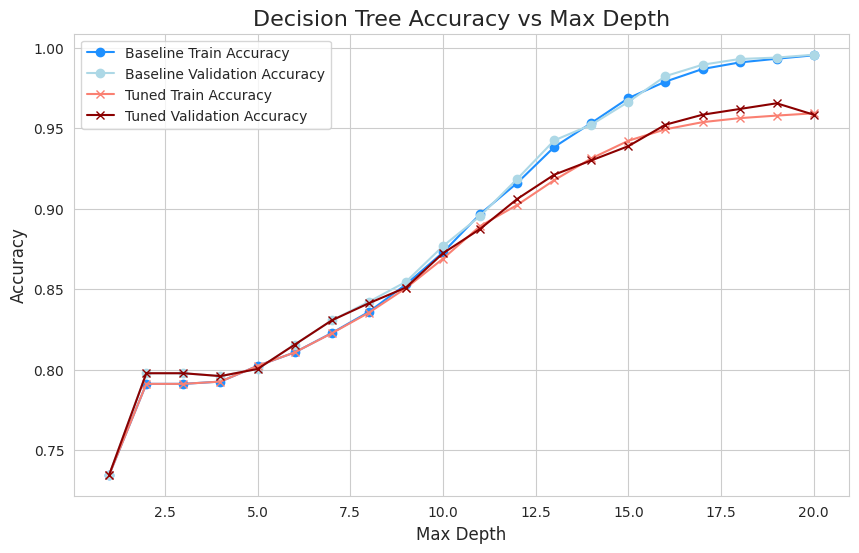

In [67]:
# Depth values ranging from 1 to 20
max_depths = list(range(1, 21))

# Lists to store accuracies
train_acc_baseline = []
val_acc_baseline = []

train_acc_tuned = []
val_acc_tuned = []

# Baseline model: no tuning, just max_depth variation
for depth in max_depths:
    # Create a baseline model with a specific max_depth
    model_baseline = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model_baseline.fit(X_train, y_train)

    # Store training and validation accuracies
    train_acc_baseline.append(accuracy_score(y_train, model_baseline.predict(X_train)))
    val_acc_baseline.append(accuracy_score(y_val, model_baseline.predict(X_val)))

# Tuned model: using max_depth and min_samples_split=5
for depth in max_depths:
    # Create a tuned model with a specific max_depth and min_samples_split
    model_tuned = DecisionTreeClassifier(max_depth=depth, min_samples_split=5, random_state=42)
    model_tuned.fit(X_train, y_train)

    # Store training and validation accuracies
    train_acc_tuned.append(accuracy_score(y_train, model_tuned.predict(X_train)))
    val_acc_tuned.append(accuracy_score(y_val, model_tuned.predict(X_val)))

# Plotting the accuracy vs max_depth for both models
plt.figure(figsize=(10, 6))

# Plot training and validation accuracies for baseline
plt.plot(max_depths, train_acc_baseline, label='Baseline Train Accuracy', marker='o', color='dodgerblue')
plt.plot(max_depths, val_acc_baseline, label='Baseline Validation Accuracy', marker='o', color='lightblue')

# Plot training and validation accuracies for tuned model
plt.plot(max_depths, train_acc_tuned, label='Tuned Train Accuracy', marker='x', color='salmon')
plt.plot(max_depths, val_acc_tuned, label='Tuned Validation Accuracy', marker='x', color='darkred')

# Title and labels
plt.title('Decision Tree Accuracy vs Max Depth', fontsize=16)
plt.xlabel('Max Depth', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

# Display grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


Summery of Decsision Tree

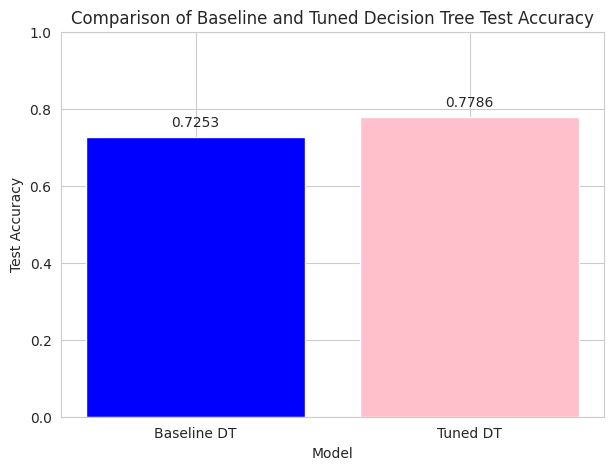

In [68]:
# Accuracy Bar Chart for Baseline and Tuned Models
import matplotlib.pyplot as plt

# Get the accuracy for the baseline DT model
baseline_dt_accuracy = accuracy # This is from the dt.predict(X_test) earlier

# Get the accuracy for the best pruned DT model
# 'test_acc' is a list of accuracies for different alphas, and 'best_index' holds the index of the best one
tuned_dt_accuracy = test_acc[best_index]

# Plotting the accuracy comparison
plt.figure(figsize=(7,5))
bars = plt.bar(['Baseline DT', 'Tuned DT'], [baseline_dt_accuracy, tuned_dt_accuracy], color=['blue', 'pink'])
plt.title('Comparison of Baseline and Tuned Decision Tree Test Accuracy')
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.ylim(0, 1)

# Add values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 4), ha='center', va='bottom')

plt.show()

# **Nurel Network Model**

Baseline Nurel Netowrk Model

In [72]:
from tensorflow.keras.callbacks import EarlyStopping

#  Split features + target
target_column = "Churn"   # your target variable
X = df.drop(columns=[target_column])
y = df[target_column]


# -------------------------------------
#  Handle inf + initial NaNs
# -------------------------------------
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.mean())   # temporary — final fill done after SMOTE

# -------------------------------------
#  Train / Validation / Test split
# -------------------------------------
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print("Train:", X_train.shape,
      "Val:", X_val.shape,
      "Test:", X_test.shape)

# -------------------------------------
#  SMOTE only on training (no leakage)
# -------------------------------------
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# -------------------------------------
#  Final NaN cleaning (use TRAIN mean)
# -------------------------------------
train_mean = X_train.mean()

X_train = pd.DataFrame(X_train).fillna(train_mean)
X_val   = pd.DataFrame(X_val).fillna(train_mean)
X_test  = pd.DataFrame(X_test).fillna(train_mean)

# -------------------------------------
#  Scaling (fit only on TRAIN)
# -------------------------------------
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val   = scaler.transform(X_val)
X_test  = scaler.transform(X_test)

# -------------------------------------
#  Sanity check
# -------------------------------------
print("NaNs in X_train:", np.isnan(X_train).sum())
print("NaNs in X_val:",   np.isnan(X_val).sum())
print("NaNs in X_test:",  np.isnan(X_test).sum())

print(" Preprocessing completed successfully.")


Train: (4930, 30) Val: (1056, 30) Test: (1057, 30)
NaNs in X_train: 0
NaNs in X_val: 0
NaNs in X_test: 0
 Preprocessing completed successfully.


Baseline Nurel Network

In [73]:
# --------------------------------
#  Baseline Neural Network
# --------------------------------
baseline_model = Sequential([
    Dense(16, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(8, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

baseline_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train baseline
history_baseline = baseline_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.6426 - loss: 0.6365 - val_accuracy: 0.7367 - val_loss: 0.5228
Epoch 2/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7518 - loss: 0.5192 - val_accuracy: 0.7491 - val_loss: 0.5162
Epoch 3/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7690 - loss: 0.4847 - val_accuracy: 0.7528 - val_loss: 0.5097
Epoch 4/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7818 - loss: 0.4744 - val_accuracy: 0.7538 - val_loss: 0.5023
Epoch 5/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7887 - loss: 0.4521 - val_accuracy: 0.7595 - val_loss: 0.4968
Epoch 6/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7859 - loss: 0.4658 - val_accuracy: 0.7661 - val_loss: 0.4950
Epoch 7/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7981 - loss: 0.4403 - val_accuracy: 0.7623 - val_loss: 0.4962
Epoch 8/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8020 - loss: 0.4354 - val_accuracy: 0

Baseline Evalution

In [74]:
# --------------------------------
#  Baseline Evaluation
# --------------------------------
baseline_train_pred = baseline_model.predict(X_train)
baseline_train_pred = np.nan_to_num(baseline_train_pred)
baseline_train_class = (baseline_train_pred > 0.5).astype(int)

baseline_val_pred = baseline_model.predict(X_val)
baseline_val_pred = np.nan_to_num(baseline_val_pred)
baseline_val_class = (baseline_val_pred > 0.5).astype(int)

baseline_test_pred = baseline_model.predict(X_test)
baseline_test_pred = np.nan_to_num(baseline_test_pred)
baseline_test_class = (baseline_test_pred > 0.5).astype(int)

print("=== Baseline Neural Network ===")
print("Train Accuracy:", accuracy_score(y_train, baseline_train_class))
print("Validation Accuracy:", accuracy_score(y_val, baseline_val_class))
print("Test Accuracy:", accuracy_score(y_test, baseline_test_class))

print("Test ROC–AUC:", roc_auc_score(y_test, baseline_test_pred))
print("\nClassification Report (Test):")
print(classification_report(y_test, baseline_test_class))

227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
=== Baseline Neural Network ===
Train Accuracy: 0.8325510767531751
Validation Accuracy: 0.7746212121212122
Test Accuracy: 0.7701040681173131
Test ROC–AUC: 0.8226373041787431

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       776
           1       0.57      0.57      0.57       281

    accuracy                           0.77      1057
   macro avg       0.71      0.70      0.71      1057
weighted avg       0.77      0.77      0.77      1057



Tunned Nurel Network

In [75]:
# --------------------------------
#  Tuned Neural Network
# --------------------------------
tuned_model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1], kernel_regularizer='l2'),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer='l2'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

tuned_model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Early stopping
early_stop_tuned = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

# Train tuned
history_tuned = tuned_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop_tuned],
    verbose=1
)

Epoch 1/100
227/227 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7025 - loss: 1.7347 - val_accuracy: 0.7528 - val_loss: 1.1313
Epoch 2/100
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7977 - loss: 0.9812 - val_accuracy: 0.7500 - val_loss: 0.8334
Epoch 3/100
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8059 - loss: 0.6972 - val_accuracy: 0.7566 - val_loss: 0.6681
Epoch 4/100
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8161 - loss: 0.5660 - val_accuracy: 0.7642 - val_loss: 0.5943
Epoch 5/100
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8142 - loss: 0.5122 - val_accuracy: 0.7680 - val_loss: 0.5682
Epoch 6/100
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8239 - loss: 0.4766 - val_accuracy: 0.7689 - val_loss: 0.5453
Epoch 7/100
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8248 - loss: 0.4561 - val_accuracy: 0.7633 - val_loss: 0.5351
Epoch 8/100
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8188 - loss: 0.4528 - val_accu

Tuned model Evaluation

In [76]:
# --------------------------------
#  Tuned Evaluation
# --------------------------------
tuned_test_pred = tuned_model.predict(X_test)
tuned_test_pred = np.nan_to_num(tuned_test_pred)
tuned_test_class = (tuned_test_pred > 0.5).astype(int)

print("=== Tuned Neural Network ===")
print("Validation Accuracy:", accuracy_score(y_val, (tuned_model.predict(X_val) > 0.5).astype(int)))
print("Test Accuracy:", accuracy_score(y_test, tuned_test_class))
print("Test ROC–AUC:", roc_auc_score(y_test, tuned_test_pred))
print("\nClassification Report (Test):")
print(classification_report(y_test, tuned_test_class))

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
=== Tuned Neural Network ===
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Validation Accuracy: 0.7821969696969697
Test Accuracy: 0.7748344370860927
Test ROC–AUC: 0.8188263565322671

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       776
           1       0.58      0.56      0.57       281

    accuracy                           0.77      1057
   macro avg       0.71      0.71      0.71      1057
weighted avg       0.77      0.77      0.77      1057



Comparison Visualization

227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


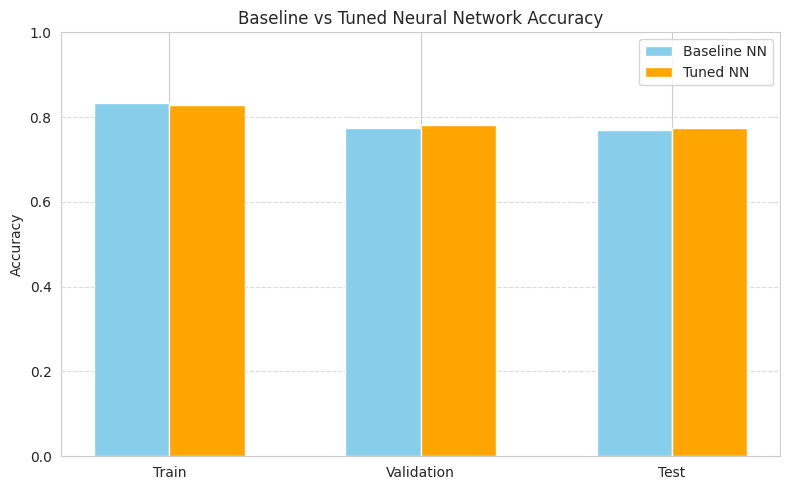

In [77]:
# Compute accuracies
baseline_acc = [
    accuracy_score(y_train, baseline_train_class),
    accuracy_score(y_val, baseline_val_class),
    accuracy_score(y_test, baseline_test_class)
]

tuned_acc = [
    accuracy_score(y_train, (tuned_model.predict(X_train) > 0.5).astype(int)),
    accuracy_score(y_val, (tuned_model.predict(X_val) > 0.5).astype(int)),
    accuracy_score(y_test, tuned_test_class)
]

# Labels
datasets = ['Train', 'Validation', 'Test']
x = range(len(datasets))

# Plot
plt.figure(figsize=(8,5))
plt.bar([i-0.15 for i in x], baseline_acc, width=0.3, label='Baseline NN', color='skyblue')
plt.bar([i+0.15 for i in x], tuned_acc, width=0.3, label='Tuned NN', color='orange')

plt.xticks(x, datasets)
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.title('Baseline vs Tuned Neural Network Accuracy')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Loss Curves

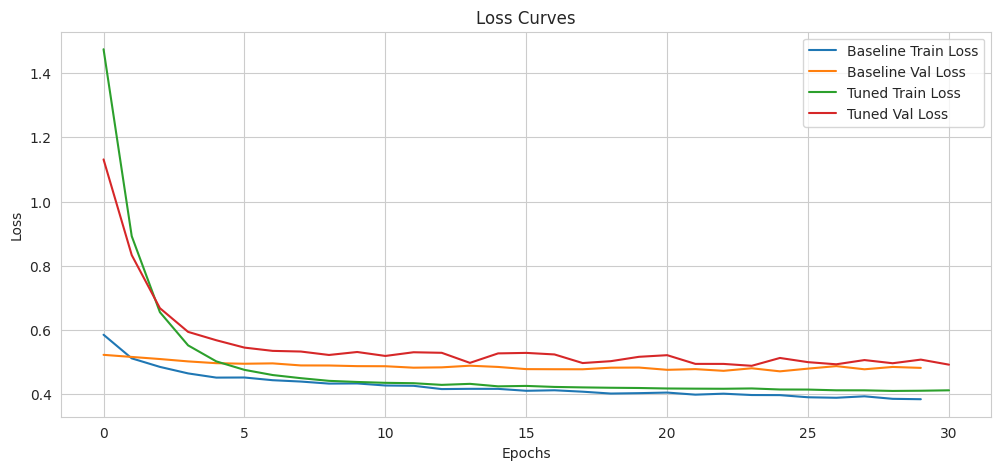

In [78]:
# Loss curves
plt.figure(figsize=(12,5))
plt.plot(history_baseline.history['loss'], label='Baseline Train Loss')
plt.plot(history_baseline.history['val_loss'], label='Baseline Val Loss')
plt.plot(history_tuned.history['loss'], label='Tuned Train Loss')
plt.plot(history_tuned.history['val_loss'], label='Tuned Val Loss')
plt.title("Loss Curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

ROC Curve

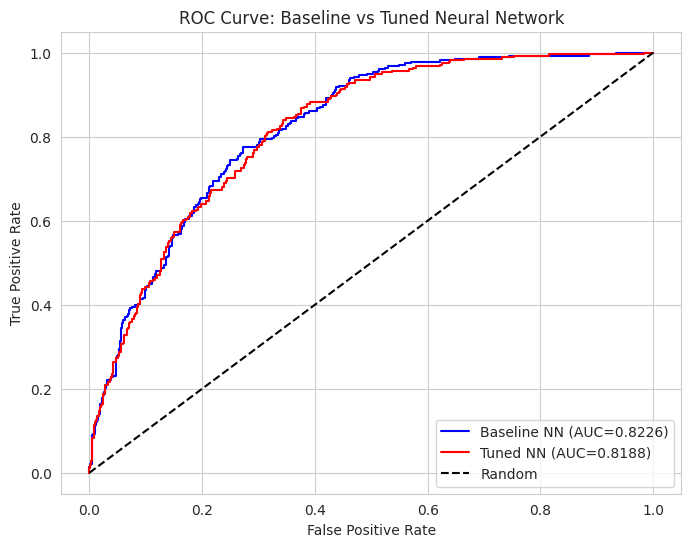

In [79]:
# ROC Curve
fpr_base, tpr_base, _ = roc_curve(y_test, baseline_test_pred)
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, tuned_test_pred)

plt.figure(figsize=(8,6))
plt.plot(fpr_base, tpr_base, label=f'Baseline NN (AUC={roc_auc_score(y_test, baseline_test_pred):.4f})', color='blue')
plt.plot(fpr_tuned, tpr_tuned, label=f'Tuned NN (AUC={roc_auc_score(y_test, tuned_test_pred):.4f})', color='red')
plt.plot([0,1],[0,1],'k--', label='Random')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: Baseline vs Tuned Neural Network")
plt.legend()
plt.grid(True)
plt.show()


Confusion Metrix

<Figure size 500x400 with 0 Axes>

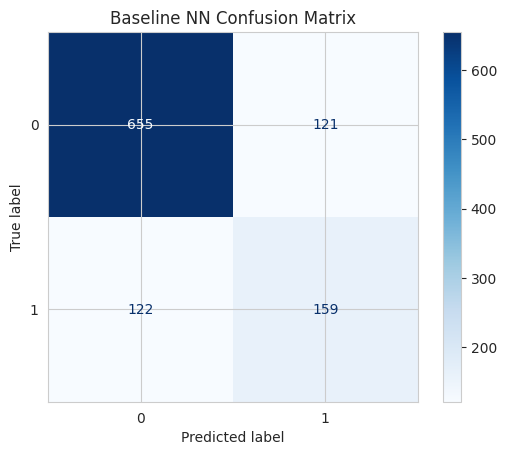

<Figure size 500x400 with 0 Axes>

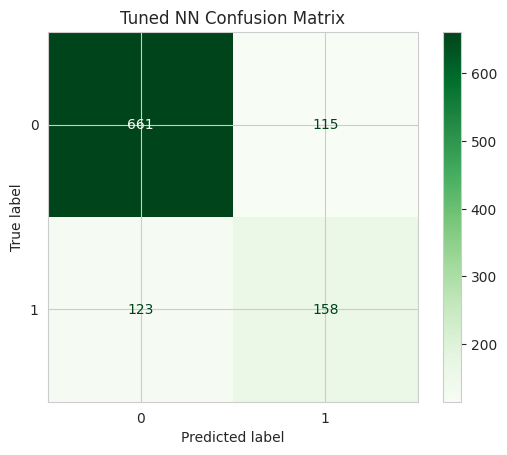

In [80]:
# Confusion Matrices
plt.figure(figsize=(5,4))
ConfusionMatrixDisplay(confusion_matrix(y_test, baseline_test_class)).plot(cmap="Blues")
plt.title("Baseline NN Confusion Matrix")
plt.show()

plt.figure(figsize=(5,4))
ConfusionMatrixDisplay(confusion_matrix(y_test, tuned_test_class)).plot(cmap="Greens")
plt.title("Tuned NN Confusion Matrix")
plt.show()